**Introduction**
The dataset originally has 330 features (columns) but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean BRFSS data into a useable format for machine learning alogrithms.

**Important risk factors for diabetes :**

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )

**About Columns :**
- Diabetes_binary : you have diabetes (0,1)
- HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)
- HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)
- CholCheck : Cholesterol check within past five years (0,1)
- BMI : Body Mass Index (BMI)
- Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)
- Stroke : (Ever told) you had a stroke. (0,1)
- HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)
- PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)
- Fruits : Consume Fruit 1 or more times per day (0,1)
- Veggies : Consume Vegetables 1 or more times per day (0,1)
- HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)
- AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or In-ian Health Service? (0,1)
- NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)
- GenHlth : Would you say that in general your health is: rate (1 ~ 5)
- MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)
- PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)
- DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)
- Sex : Indicate sex of respondent (0,1) (Female or Male)
- Age : Fourteen-level age category (1 ~ 14)
- Education : What is the highest grade or year of school you completed? (1 ~ 6)
- Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

**1: Import Libraries and Setup**

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
)
from sklearn.metrics import classification_report
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import tensorflow as tf


# Scikit-learn utilities
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings

# Configure settings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)

print("✅ All libraries imported successfully!")
print("🎯 Week 2: Feature Engineering & Deep Learning Preparation")
print("=" * 70)


✅ All libraries imported successfully!
🎯 Week 2: Feature Engineering & Deep Learning Preparation


**Import dataset again (same as week 1)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

sns.set_style("whitegrid")

# fetch dataset
datset = fetch_ucirepo(id=891)  # CDC Diabetes Health Indicators
# data (as pandas dataframes)
X = datset.data.features  # feature set
y = datset.data.targets  # target variable
# combine features and target into a single dataframe for easier analysis
df = pd.concat([X, y], axis=1)
# df.head()
# Programmatically merge df columns with datset.variables metadata
try:
    if (
        isinstance(datset.variables, pd.DataFrame)
        and "name" in datset.variables.columns
    ):
        df_columns = pd.DataFrame({"name": df.columns})
        merged = pd.merge(datset.variables, df_columns, on="name", how="right")
        pd.set_option("display.max_colwidth", True)
        display(merged)
    else:
        print("datset.variables is not a DataFrame with a 'name' column.")
        print(datset.variables)
except Exception as e:
    print("Error combining variables:", e)


,name,role,type,demographic,description,units,missing_values
0,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
1,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
2,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years,None,no
3,BMI,Feature,Integer,None,Body Mass Index,None,no
4,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes,None,no
5,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
6,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes,None,no
7,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not including job 0 = no 1 = yes,None,no
8,Fruits,Feature,Binary,None,Consume Fruit 1 or more times per day 0 = no 1 = yes,None,no
9,Veggies,Feature,Binary,None,Consume Vegetables 1 or more times per day 0 = no 1 = yes,None,no


#### 2. Data Cleanup

**2.1 Remove duplicate rows**

In [ ]:
print("====DELETE DUPLICATE ROWS=====")
## Original dataset shape
print("Original dataset (df) shape:", df.shape)
# Duplicate rows:
print("Duplicate rows:", df.duplicated().sum())
# Drop duplicates
df_dedupe = df.drop_duplicates()

# Cleaned dataset shape
print("Cleaned dataset (df_dedupe) shape:", df_dedupe.shape)

# Compare original and cleaned dataset
print("Number of rows removed:", len(df) - len(df_dedupe))

print("\n✅ All duplicate rows removed")


====DELETE DUPLICATE ROWS=====
Original dataset (df) shape: (253680, 22)
Duplicate rows: 24206
Cleaned dataset (df_dedupe) shape: (229474, 22)
Number of rows removed: 24206

✅ All duplicate rows removed


**2.2 Optimize Data Sets**

- Optimizing data types reduces the memory footprint of your dataset, which is crucial when working with large data or limited resources.
Downcasting numeric columns and converting suitable object columns to category types can significantly decrease RAM usage.
Lower memory usage enables faster data processing, more efficient model training, and the ability to handle larger datasets.
This step is especially important for scalable machine learning pipelines and neural network training, where memory efficiency directly impacts performance and feasibility.

In [ ]:
# Analyze current data types
print("=== DATA TYPE OPTIMIZATION ===")
print("Current data types:")
print(df_dedupe.dtypes.value_counts())

# Check for float columns that could be integers
print("\nAnalyzing float64 columns for potential integer conversion:")
float_columns = df_dedupe.select_dtypes(include=["float64"]).columns
if float_columns.empty:
    print("\n---No float64 columns found that could be converted to integers.\n")
else:
    for col in float_columns:
        # Check if all values are whole numbers
        if df_dedupe[col].apply(lambda x: x.is_integer()).all():
            print(
                f"  {col}: Can be converted to integer since all values are whole numbers"
            )
            df_dedupe[col] = df_dedupe[col].astype("int32")
        else:
            print(
                f"  {col}: Must remain float64 as it contains one or more decimal values"
            )
            # Check range to determine if int32 or int64 is appropriate
            min_val, max_val = df_dedupe[col].min(), df_dedupe[col].max()
            print(f"   Range: {min_val} to {max_val}")

# Optimize integer columns
print(f"\nOptimizing integer columns:")
int_columns = df_dedupe.select_dtypes(include=["int64"]).columns
for col in int_columns:
    min_val, max_val = df_dedupe[col].min(), df_dedupe[col].max()
    if min_val >= 0 and max_val <= 255:
        df_dedupe[col] = df_dedupe[col].astype("uint8")
        print(f"  {col}: Optimized to uint8 (range: {min_val}-{max_val})")
    elif min_val >= -128 and max_val <= 127:
        df_dedupe[col] = df_dedupe[col].astype("int8")
        print(f"  {col}: Optimized to int8 (range: {min_val}-{max_val})")
    elif min_val >= 0 and max_val <= 65535:
        df_dedupe[col] = df_dedupe[col].astype("uint16")
        print(f"  {col}: Optimized to uint16 (range: {min_val}-{max_val})")
    else:
        df_dedupe[col] = df_dedupe[col].astype("int32")
        print(f"  {col}: Optimized to int32 (range: {min_val}-{max_val})")

print(
    f"\n✅ Memory usage after optimization: {df_dedupe.memory_usage(deep=True).sum() / 1024**2:.2f} MB"
)
print(
    f"✅ Memory reduction:--> {((df.memory_usage(deep=True).sum() - df_dedupe.memory_usage(deep=True).sum()) / df.memory_usage(deep=True).sum() * 100):.2f}%"
)


=== DATA TYPE OPTIMIZATION ===
Current data types:
uint8    22
Name: count, dtype: int64

Analyzing float64 columns for potential integer conversion:

---No float64 columns found that could be converted to integers.


Optimizing integer columns:

✅Memory usage after optimization: 6.57 MB
✅Memory reduction:--> 84.58%


In [ ]:
# Separate features and target
X_raw = df_dedupe.drop("Diabetes_binary", axis=1)
y_raw = df_dedupe["Diabetes_binary"]

print(f"Features shape: {X_raw.shape}")
print(f"Target shape: {y_raw.shape}")
print(f"Feature columns: {list(X_raw.columns)}")

# Verify target distribution after deduplication
target_counts = y_raw.value_counts()
target_dist = y_raw.value_counts(normalize=True) * 100

print(f"\nTarget distribution after deduplication:")
print(f"  0 (No Diabetes): {target_counts[0]:,} ({target_dist[0]:.2f}%)")
print(f"  1 (Diabetes/Prediabetes): {target_counts[1]:,} ({target_dist[1]:.2f}%)")
print(f"  Class Imbalance Ratio: {target_dist[0]/target_dist[1]:.1f}:1")


Features shape: (229474, 21)
Target shape: (229474,)
Feature columns: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Target distribution after deduplication:
  0 (No Diabetes): 194,377 (84.71%)
  1 (Diabetes/Prediabetes): 35,097 (15.29%)
  Class Imbalance Ratio: 5.5:1


#### **BMI Categorization**
Clinical Significance: This transformation converts continuous BMI values into clinically meaningful categories following WHO standards. The results show a realistic population distribution with the majority falling into overweight (25.3%) and obesity categories (42.8% combined), aligning with US population health statistics. This categorization will enable the neural network to learn non-linear relationships between BMI thresholds and diabetes risk, potentially improving both model performance and clinical interpretability.

In [ ]:
def create_bmi_categories(bmi_values):
    """
    Create WHO standard BMI categories from numerical BMI values.

    Categories:
    - 0: Underweight (< 18.5)
    - 1: Normal (18.5 - 24.9)
    - 2: Overweight (25.0 - 29.9)
    - 3: Obesity Class I (30.0 - 34.9)
    - 4: Obesity Class II (35.0 - 39.9)
    - 5: Obesity Class III (>= 40.0)
    """
    categories = np.zeros(len(bmi_values), dtype=int)

    # Define BMI thresholds
    categories[bmi_values < 18.5] = 0  # Underweight
    categories[(bmi_values >= 18.5) & (bmi_values < 25.0)] = 1  # Normal
    categories[(bmi_values >= 25.0) & (bmi_values < 30.0)] = 2  # Overweight
    categories[(bmi_values >= 30.0) & (bmi_values < 35.0)] = 3  # Obesity Class I
    categories[(bmi_values >= 35.0) & (bmi_values < 40.0)] = 4  # Obesity Class II
    categories[bmi_values >= 40.0] = 5  # Obesity Class III

    return categories


# Apply BMI categorization
print("=== BMI CATEGORIZATION ===")
print("Original BMI statistics:")
print(X_raw["BMI"].describe())

# Create BMI categories
X_engineered = X_raw.copy()
X_engineered["bmi_category"] = create_bmi_categories(X_raw["BMI"])

# Display BMI category distribution
bmi_cat_names = [
    "Underweight",
    "Normal",
    "Overweight",
    "Obesity I",
    "Obesity II",
    "Obesity III",
]
bmi_cat_counts = pd.Series(X_engineered["bmi_category"]).value_counts().sort_index()

print("\nBMI Category Distribution:")
for i, (count) in enumerate(bmi_cat_counts):
    percentage = (count / len(X_engineered)) * 100
    print(f"  {i} ({bmi_cat_names[i]}): {count:,} ({percentage:.2f}%)")


=== BMI CATEGORIZATION ===
Original BMI statistics:
count    229474.000000
mean     28.687507    
std      6.789204     
min      12.000000    
25%      24.000000    
50%      27.000000    
75%      32.000000    
max      98.000000    
Name: BMI, dtype: float64

BMI Category Distribution:
  0 (Underweight): 3,052 (1.33%)
  1 (Normal): 58,842 (25.64%)
  2 (Overweight): 82,723 (36.05%)
  3 (Obesity I): 50,693 (22.09%)
  4 (Obesity II): 20,448 (8.91%)
  5 (Obesity III): 13,716 (5.98%)


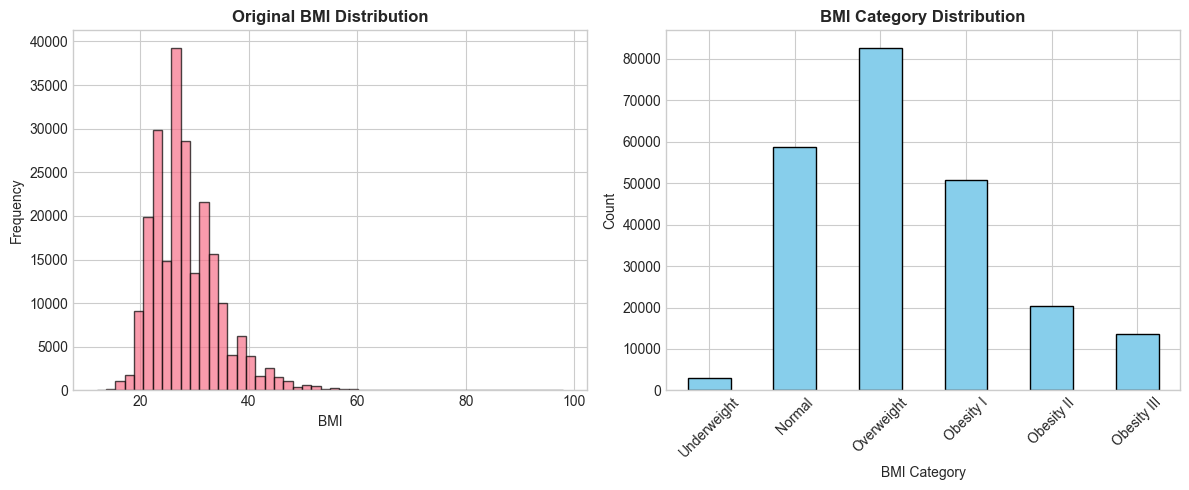


BMI Categories vs Diabetes Risk:
Diabetes_binary      0      1
bmi_category                 
0                94.46  5.54 
1                93.36  6.64 
2                87.23  12.77
3                79.89  20.11
4                72.35  27.65
5                66.41  33.59


In [ ]:
# Visualize BMI category distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
X_raw["BMI"].hist(bins=50, alpha=0.7, edgecolor="black")
plt.title("Original BMI Distribution", fontweight="bold")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
bmi_cat_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("BMI Category Distribution", fontweight="bold")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(range(6), bmi_cat_names, rotation=45)

plt.tight_layout()
plt.show()

# Analyze BMI categories vs diabetes target
print("\nBMI Categories vs Diabetes Risk:")
bmi_diabetes_crosstab = (
    pd.crosstab(X_engineered["bmi_category"], y_raw, normalize="index") * 100
)
print(bmi_diabetes_crosstab.round(2))


🏷️ **Categorical Feature Encoding**
- Q: Which categorical features in the dataset have more than two unique values?
- Q: Apply integer-encoding to these high-cardinality features. Why is this strategy suitable for a subsequent neural network with an embedding layer?
- Q: Display the first 5 rows of the transformed data to show the new integer labels.


In [ ]:
# Function to identify categorical and numeric columns
def get_column_types(df, cardinality_threshold=20):
    categorical_binary = []
    categorical = []
    numeric = []
    for col in df.columns:
        dtype = df[col].dtype
        nunique = df[col].nunique()
        if dtype == "object" or dtype.name == "category":
            if nunique == 2:
                categorical_binary.append(col)
            else:
                categorical.append(col)
        elif pd.api.types.is_integer_dtype(dtype):
            if nunique == 2:
                categorical_binary.append(col)
            elif nunique < cardinality_threshold:
                categorical.append(col)
            else:
                numeric.append(col)
        elif pd.api.types.is_float_dtype(dtype):
            numeric.append(col)
    return categorical_binary, categorical, numeric


cat_bin_cols, cat_cols, num_cols = get_column_types(df_dedupe)
print("✅ Categorical binary features with 2 unique values:", cat_bin_cols)
print("✅ Categorical (non-binary) features with more than 2 unique values:", cat_cols)
print("✅ Numeric/continuous columns:", num_cols)


✅ Categorical binary features with 2 unique values: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Diabetes_binary']
✅ Categorical (non-binary) features with more than 2 unique values: ['GenHlth', 'Age', 'Education', 'Income']
✅ Numeric/continuous columns: ['BMI', 'MentHlth', 'PhysHlth']


🔎 Identify high-cardinality categorical features

In [ ]:
# Identify high cardinality categorical features to encode
def identify_high_cardinality_features(df, low_threshold, up_threshold):
    """
    Identify categorical features with more than threshold unique values. High-cardinality categorical variables are good candidates for integer encoding + embeddings in neural networks.

    Args:
        df (pd.DataFrame): The dataset
        threshold (int): Threshold for high cardinality

    Returns:
        list: High cardinality categorical features
    """
    high_cardinality = []

    for col in df_dedupe.columns:
        if col != "Diabetes_binary":  # Exclude target
            unique_count = df[col].nunique()
            # Consider as categorical if it has discrete values and not too many
            if low_threshold < unique_count <= up_threshold:
                high_cardinality.append(col)
    return high_cardinality


# Invoke the function with desired thresholds
low_threshold = 2
up_threshold = 20
high_cat_candidates = identify_high_cardinality_features(
    df_dedupe, low_threshold, up_threshold
)
print(
    f"✅ High-cardinality categorical features (more than {low_threshold} unique values):",
    high_cat_candidates,
)


✅ High-cardinality categorical features (more than 2 unique values): ['GenHlth', 'Age', 'Education', 'Income']


In [ ]:
import pandas as pd

# Define the mappings for each high-cardinality feature
gen_hlth_map = {1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"}

age_map = {
    1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "65-69",
    11: "70-74",
    12: "75-79",
    13: "80 or older",
}

education_map = {
    1: "Never attended school or only kindergarten",
    2: "Grades 1-8 (Elementary)",
    3: "Grades 9-11 (Some high school)",
    4: "Grade 12 or GED (High school graduate)",
    5: "College 1-3 years (Some college or technical school)",
    6: "College 4 years or more (College graduate)",
}

income_map = {
    1: "Less than $10,000",
    2: "$10,000 to less than $15,000",
    3: "$15,000 to less than $20,000",
    4: "$20,000 to less than $25,000",
    5: "$25,000 to less than $35,000",
    6: "$35,000 to less than $50,000",
    7: "$50,000 to less than $75,000",
    8: "$75,000 or more",
}

# Combine all mappings into a list of dictionaries for DataFrame creation
all_mappings = []
for value, meaning in gen_hlth_map.items():
    all_mappings.append({"Feature": "GenHlth", "Value": value, "Meaning": meaning})

for value, meaning in age_map.items():
    all_mappings.append({"Feature": "Age", "Value": value, "Meaning": meaning})

for value, meaning in education_map.items():
    all_mappings.append({"Feature": "Education", "Value": value, "Meaning": meaning})

for value, meaning in income_map.items():
    all_mappings.append({"Feature": "Income", "Value": value, "Meaning": meaning})

# Create and display the DataFrame
mappings_df = pd.DataFrame(all_mappings)

# Print the DataFrame as a clean markdown table
print(mappings_df.to_markdown(index=False))


| Feature   |   Value | Meaning                                              |
|:----------|--------:|:-----------------------------------------------------|
| GenHlth   |       1 | Excellent                                            |
| GenHlth   |       2 | Very Good                                            |
| GenHlth   |       3 | Good                                                 |
| GenHlth   |       4 | Fair                                                 |
| GenHlth   |       5 | Poor                                                 |
| Age       |       1 | 18-24                                                |
| Age       |       2 | 25-29                                                |
| Age       |       3 | 30-34                                                |
| Age       |       4 | 35-39                                                |
| Age       |       5 | 40-44                                                |
| Age       |       6 | 45-49                       

🔤 Encoding for categorical features

In [ ]:
# Identify high-cardinality categorical features
print("=== HIGH-CARDINALITY FEATURE ENCODING ===")

# Key high-cardinality features identified: bmi_category, Age, GenHlth
high_cardinality_features = ["bmi_category", "Age", "GenHlth"]

print("Features requiring integer encoding:")
for feature in high_cardinality_features:
    unique_vals = X_engineered[feature].nunique()
    print(f"  {feature}: {unique_vals} unique values")
    print(f"    Range: {X_engineered[feature].min()} to {X_engineered[feature].max()}")
    print(f"    Values: {sorted(X_engineered[feature].unique())}")
    print()

# Apply LabelEncoder to high-cardinality features
label_encoders = {}
X_encoded = X_engineered.copy()

for feature in high_cardinality_features:
    le = LabelEncoder()
    X_encoded[f"{feature}_encoded"] = le.fit_transform(X_engineered[feature])
    label_encoders[feature] = le

    print(f"Encoded {feature}:")
    print(
        f"  Original range: {X_engineered[feature].min()} - {X_engineered[feature].max()}"
    )
    print(
        f"  Encoded range: {X_encoded[f'{feature}_encoded'].min()} - {X_encoded[f'{feature}_encoded'].max()}"
    )


=== HIGH-CARDINALITY FEATURE ENCODING ===
Features requiring integer encoding:
  bmi_category: 6 unique values
    Range: 0 to 5
    Values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

  Age: 13 unique values
    Range: 1 to 13
    Values: [np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9), np.uint8(10), np.uint8(11), np.uint8(12), np.uint8(13)]

  GenHlth: 5 unique values
    Range: 1 to 5
    Values: [np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5)]

Encoded bmi_category:
  Original range: 0 - 5
  Encoded range: 0 - 5
Encoded Age:
  Original range: 1 - 13
  Encoded range: 0 - 12
Encoded GenHlth:
  Original range: 1 - 5
  Encoded range: 0 - 4


In [ ]:
print("First 5 rows of transformed data with integer labels:")
print(X_encoded[[f"{feature}_encoded" for feature in high_cardinality_features]].head())


First 5 rows of transformed data with integer labels:
   bmi_category_encoded  Age_encoded  GenHlth_encoded
0  5                     8            4              
1  2                     6            2              
2  2                     8            4              
3  2                     10           1              
4  1                     10           1              


📏 **Scaling numerical features**

In [ ]:
# Identify numerical features requiring scaling
print("=== NUMERICAL FEATURE SCALING ===")

# Based on Week 1 EDA findings: MentHlth and PhysHlth show right-skewed distributions
# BMI will be kept as original since we created categorical version
numerical_features_to_scale = ["MentHlth", "PhysHlth"]

print("Numerical features requiring scaling:")
for feature in numerical_features_to_scale:
    print(f"\n{feature} statistics:")
    print(f"  Mean: {X_encoded[feature].mean():.2f}")
    print(f"  Std: {X_encoded[feature].std():.2f}")
    print(f"  Range: {X_encoded[feature].min()} to {X_encoded[feature].max()}")
    print(f"  Skewness: {X_encoded[feature].skew():.2f}")

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = X_encoded.copy()

# Fit and transform the numerical features
X_scaled[numerical_features_to_scale] = scaler.fit_transform(
    X_encoded[numerical_features_to_scale]
)

print(f"\nScaling applied using StandardScaler")

# Show summary statistics after scaling
print("\nSummary statistics after scaling:")
scaled_stats = X_scaled[numerical_features_to_scale].describe()
print(scaled_stats)

# Verify scaling worked correctly (mean ≈ 0, std ≈ 1)
print("\nScaling verification:")
for feature in numerical_features_to_scale:
    mean_val = X_scaled[feature].mean()
    std_val = X_scaled[feature].std()
    print(f"  {feature}: Mean = {mean_val:.6f}, Std = {std_val:.6f}")


=== NUMERICAL FEATURE SCALING ===
Numerical features requiring scaling:

MentHlth statistics:
  Mean: 3.51
  Std: 7.72
  Range: 0 to 30
  Skewness: 2.54

PhysHlth statistics:
  Mean: 4.68
  Std: 9.05
  Range: 0 to 30
  Skewness: 2.04

Scaling applied using StandardScaler

Summary statistics after scaling:
           MentHlth      PhysHlth
count  2.294740e+05  2.294740e+05
mean  -2.675287e-17  2.972542e-17
std    1.000002e+00  1.000002e+00
min   -4.547857e-01 -5.172127e-01
25%   -4.547857e-01 -5.172127e-01
50%   -4.547857e-01 -5.172127e-01
75%   -1.956387e-01 -7.526566e-02
max    3.432420e+00  2.797390e+00

Scaling verification:
  MentHlth: Mean = -0.000000, Std = 1.000002
  PhysHlth: Mean = 0.000000, Std = 1.000002


✂️ Stratified train/val/test split

In [ ]:
# Prepare final feature set for splitting
print("=== STRATIFIED DATA SPLITTING ===")

# Use encoded features and keep original features for interpretation
final_features = [
    col for col in X_scaled.columns if col not in high_cardinality_features
]
X_final = X_scaled[final_features]

print(f"Final feature set shape: {X_final.shape}")
print(f"Final features: {list(X_final.columns)}")

# Perform stratified split: 70% train, 30% temp (which becomes 15% val + 15% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_final, y_raw, test_size=0.15, stratify=y_raw, random_state=42  # 15% for test
)

# Split remaining 85% into 70% train and 15% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=(0.15 / 0.85),  # 15% of total dataset for validation
    stratify=y_temp,
    random_state=42,
)

print(f"\nData split results:")
print(
    f"  Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X_final)*100:.1f}%)"
)
print(
    f"  Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X_final)*100:.1f}%)"
)
print(
    f"  Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X_final)*100:.1f}%)"
)


=== STRATIFIED DATA SPLITTING ===
Final feature set shape: (229474, 22)
Final features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'bmi_category_encoded', 'Age_encoded', 'GenHlth_encoded']

Data split results:
  Training set: 160,631 samples (70.0%)
  Validation set: 34,421 samples (15.0%)
  Test set: 34,422 samples (15.0%)


✅ Verify stratification


=== STRATIFICATION VERIFICATION ===

Training set:
  0 (No Diabetes): 136,063 (84.71%)
  1 (Diabetes): 24,568 (15.29%)
  Imbalance ratio: 5.5:1

Validation set:
  0 (No Diabetes): 29,157 (84.71%)
  1 (Diabetes): 5,264 (15.29%)
  Imbalance ratio: 5.5:1

Test set:
  0 (No Diabetes): 29,157 (84.70%)
  1 (Diabetes): 5,265 (15.30%)
  Imbalance ratio: 5.5:1


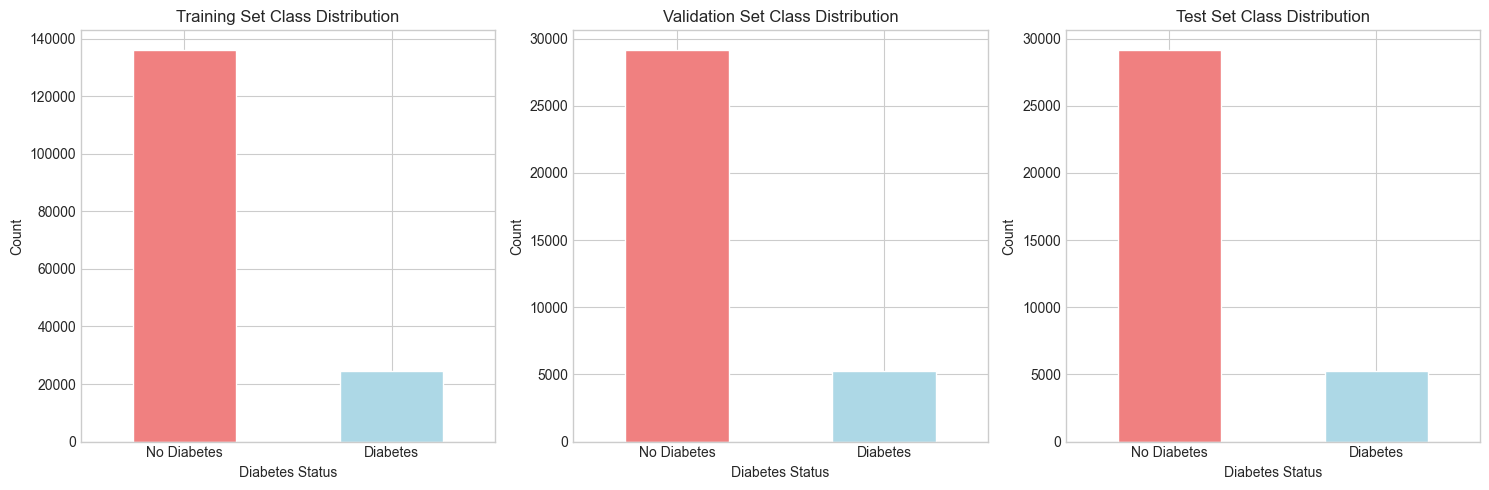


✅ Stratification successful: Class balance maintained across all splits


In [ ]:
# Verify stratification worked correctly
print("\n=== STRATIFICATION VERIFICATION ===")
datasets = [("Training", y_train), ("Validation", y_val), ("Test", y_test)]

for name, y_set in datasets:
    counts = y_set.value_counts()
    percentages = y_set.value_counts(normalize=True) * 100
    print(f"\n{name} set:")
    print(f"  0 (No Diabetes): {counts[0]:,} ({percentages[0]:.2f}%)")
    print(f"  1 (Diabetes): {counts[1]:,} ({percentages[1]:.2f}%)")
    print(f"  Imbalance ratio: {percentages[0]/percentages[1]:.1f}:1")

# Visualize class distributions across splits
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, y_set) in enumerate(datasets):
    y_set.value_counts().plot(kind="bar", ax=axes[i], color=["lightcoral", "lightblue"])
    axes[i].set_title(f"{name} Set Class Distribution")
    axes[i].set_xlabel("Diabetes Status")
    axes[i].set_ylabel("Count")
    axes[i].set_xticklabels(["No Diabetes", "Diabetes"], rotation=0)

plt.tight_layout()
plt.show()

print("\n✅ Stratification successful: Class balance maintained across all splits")


**Create PyTorch DataLoader Objects**

In [ ]:
# Convert pandas DataFrames to PyTorch tensors and create  data loaders.
print("=== CREATING PYTORCH DATALOADER OBJECTS ===")
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).unsqueeze(
    1
)  # For binary classification
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# Create DataLoaders
batch_size = 64  # Typical batch size for training
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # Critical for training
    num_workers=0,  # To avoid multiprocessing issues on Windows
    pin_memory=True if torch.cuda.is_available() else False,
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False,
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle test data
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False,
)

print(
    f"Training DataLoader: {len(train_loader.dataset)} samples, {len(train_loader)} batches"
)
print(
    f"Validation DataLoader: {len(val_loader.dataset)} samples, {len(val_loader)} batches"
)
print(
    f"Test DataLoader: {len(test_loader.dataset)} samples, {len(test_loader)} batches"
)
print("✅ PyTorch DataLoader objects created successfully!")


=== CREATING PYTORCH DATALOADER OBJECTS ===
Training DataLoader: 160631 samples, 2510 batches
Validation DataLoader: 34421 samples, 538 batches
Test DataLoader: 34422 samples, 538 batches
✅ PyTorch DataLoader objects created successfully!


In [ ]:
# verify DataLoader
print("=== VERIFYING DATALOADER CONTENTS ===")
# Fetch a single batch from the training DataLoader
for X_batch, y_batch in train_loader:
    print(f"Batch X shape: {X_batch.shape}")
    print(f"Batch y shape: {y_batch.shape}")
    print(f"First 5 labels in batch: {y_batch[:5].squeeze().tolist()}")
    break  # Only need to check the first batch


=== VERIFYING DATALOADER CONTENTS ===
Batch X shape: torch.Size([64, 22])
Batch y shape: torch.Size([64, 1])
First 5 labels in batch: [1, 0, 1, 0, 0]


🧾 Feature engineering summary

In [ ]:
import json
from pprint import pprint
import pandas as pd


def generate_feature_engineering_summary(
    original_df,
    processed_df,
    encoding_mappings,
    scalers,
    split_info,
    *,
    as_dfs=False,
    verbose=False,
    mapping_preview_n=5,
):
    """
    Generate a comprehensive summary of feature engineering steps.

    Args:
        original_df (pd.DataFrame): Original dataset
        processed_df (pd.DataFrame): Processed dataset
        encoding_mappings (dict): {feature: {'encoder': LabelEncoder, 'mapping': {orig:str->int}}}
        scalers (dict): {feature: fitted scaler}
        split_info (dict): Any metadata about splits (sizes, ratios, etc.)
        as_dfs (bool): If True, also return tidy DataFrames for display
        verbose (bool): If True, pretty-print a human-readable summary
        mapping_preview_n (int): How many mapping items to preview per encoded feature

    Returns:
        dict (always): 'summary' dict with details
        dict of DataFrames (optional, when as_dfs=True):
            {'overview': df, 'encoding': df, 'scaling': df, 'splits': df}
    """
    summary = {
        "data_transformation": {
            "original_shape": original_df.shape,
            "processed_shape": processed_df.shape,
            "features_encoded": len(encoding_mappings),
            "features_scaled": len(scalers),
        },
        "encoding_details": {},
        "scaling_details": {},
        "data_splits": split_info if isinstance(split_info, dict) else {},
    }

    # Encoding details
    for feature, mapping in encoding_mappings.items():
        mp = mapping.get("mapping", {})
        preview_items = list(mp.items())[:mapping_preview_n]
        summary["encoding_details"][feature] = {
            "original_unique_values": len(mp),
            "encoding_type": "Integer Encoding",
            "mapping_preview": dict(preview_items),
        }

    # Scaling details
    for feature, scaler in scalers.items():
        if hasattr(scaler, "mean_"):  # StandardScaler
            summary["scaling_details"][feature] = {
                "scaling_type": "Standard Scaling",
                "mean": float(scaler.mean_[0]),
                "scale": float(scaler.scale_[0]),
            }
        elif hasattr(scaler, "min_"):  # MinMaxScaler
            summary["scaling_details"][feature] = {
                "scaling_type": "MinMax Scaling",
                "min": float(scaler.min_[0]),
                "scale": float(scaler.scale_[0]),
            }
        else:
            summary["scaling_details"][feature] = {
                "scaling_type": type(scaler).__name__,
                "details": "Scaler does not expose mean_/min_ attributes",
            }

    if verbose:
        print("=== Data Transformation ===")
        print(f"Original shape:  {summary['data_transformation']['original_shape']}")
        print(f"Processed shape: {summary['data_transformation']['processed_shape']}")
        print(f"Features encoded: {summary['data_transformation']['features_encoded']}")
        print(
            f"Features scaled:  {summary['data_transformation']['features_scaled']}\n"
        )

        print("=== Encoding Details ===")
        if summary["encoding_details"]:
            for feat, det in summary["encoding_details"].items():
                print(
                    f"- {feat}: {det['encoding_type']} (unique={det['original_unique_values']})"
                )
                print(f"  preview: {det['mapping_preview']}")
        else:
            print("  (none)")
        print()

        print("=== Scaling Details ===")
        if summary["scaling_details"]:
            for feat, det in summary["scaling_details"].items():
                print(
                    f"- {feat}: {det['scaling_type']} | { {k:v for k,v in det.items() if k!='scaling_type'} }"
                )
        else:
            print("  (none)")
        print()

        if summary["data_splits"]:
            print("=== Data Splits ===")
            pprint(summary["data_splits"])
            print()

    if not as_dfs:
        return summary

    # Build nice DataFrames for display
    overview_df = pd.DataFrame([summary["data_transformation"]])

    if summary["encoding_details"]:
        enc_rows = []
        for feat, det in summary["encoding_details"].items():
            enc_rows.append(
                {
                    "feature": feat,
                    "encoding_type": det["encoding_type"],
                    "original_unique_values": det["original_unique_values"],
                    "mapping_preview": json.dumps(det["mapping_preview"]),
                }
            )
        encoding_df = pd.DataFrame(enc_rows).sort_values("feature")
    else:
        encoding_df = pd.DataFrame(
            columns=[
                "feature",
                "encoding_type",
                "original_unique_values",
                "mapping_preview",
            ]
        )

    if summary["scaling_details"]:
        sc_rows = []
        for feat, det in summary["scaling_details"].items():
            row = {"feature": feat, "scaling_type": det.get("scaling_type", "")}
            for k, v in det.items():
                if k != "scaling_type":
                    row[k] = v
            sc_rows.append(row)
        scaling_df = pd.DataFrame(sc_rows).sort_values("feature")
    else:
        scaling_df = pd.DataFrame(
            columns=["feature", "scaling_type", "mean", "scale", "min"]
        )

    if summary["data_splits"]:
        splits_df = pd.DataFrame([summary["data_splits"]])
    else:
        splits_df = pd.DataFrame()

    return summary, {
        "overview": overview_df,
        "encoding": encoding_df,
        "scaling": scaling_df,
        "splits": splits_df,
    }


# Summarize feature engineering
split_info = {
    "train_size": len(y_train),
    "val_size": len(y_val),
    "test_size": len(y_test),
}
summary = generate_feature_engineering_summary(
    df_dedupe, df_scaled, enc_maps, scalers, split_info
)
print("=== Feature Engineering Summary ===")
for key, value in summary.items():
    print(f"{key}: {value}")


=== Feature Engineering Summary ===
data_transformation: {'original_shape': (229474, 22), 'processed_shape': (229474, 22), 'features_encoded': 4, 'features_scaled': 20}
encoding_details: {'GenHlth': {'original_unique_values': 5, 'encoding_type': 'Integer Encoding', 'mapping_preview': {'1': np.int64(0), '2': np.int64(1), '3': np.int64(2), '4': np.int64(3), '5': np.int64(4)}}, 'Age': {'original_unique_values': 13, 'encoding_type': 'Integer Encoding', 'mapping_preview': {'1': np.int64(0), '10': np.int64(1), '11': np.int64(2), '12': np.int64(3), '13': np.int64(4)}}, 'Education': {'original_unique_values': 6, 'encoding_type': 'Integer Encoding', 'mapping_preview': {'1': np.int64(0), '2': np.int64(1), '3': np.int64(2), '4': np.int64(3), '5': np.int64(4)}}, 'Income': {'original_unique_values': 8, 'encoding_type': 'Integer Encoding', 'mapping_preview': {'1': np.int64(0), '2': np.int64(1), '3': np.int64(2), '4': np.int64(3), '5': np.int64(4)}}}
scaling_details: {'HighBP': {'scaling_type': 'Stan

🔁 Before/after comparison (stats only)

In [ ]:
def create_before_after_comparison(original_df, processed_df, features_to_compare):
    """
    Create visualizations comparing features before and after processing.

    (Note: This function returns stats; you can add your own visualizations in separate cells.)

    Args:
        original_df (pd.DataFrame): Original dataset
        processed_df (pd.DataFrame): Processed dataset
        features_to_compare (list): Features to compare

    Returns:
        dict: Comparison statistics and visualizations
    """
    comparisons = {}

    for feature in features_to_compare:
        if feature in original_df.columns and feature in processed_df.columns:
            comparison = {
                "original_stats": {
                    "mean": original_df[feature].mean(),
                    "std": original_df[feature].std(),
                    "min": original_df[feature].min(),
                    "max": original_df[feature].max(),
                },
                "processed_stats": {
                    "mean": processed_df[feature].mean(),
                    "std": processed_df[feature].std(),
                    "min": processed_df[feature].min(),
                    "max": processed_df[feature].max(),
                },
            }
            comparisons[feature] = comparison

    return comparisons


# Compare before/after for selected features
Compare_stats = create_before_after_comparison(df, df_scaled, features_to_scale[:5])
print("Comparison stats for selected features:")
for feature, stats in Compare_stats.items():
    print(f"- {feature}:")
    print(f"  Original: {stats['original_stats']}")
    print(f"  Processed: {stats['processed_stats']}")


Comparison stats for selected features:
- HighBP:
  Original: {'mean': np.float64(0.4290011037527594), 'std': np.float64(0.4949344626899013), 'min': np.int64(0), 'max': np.int64(1)}
  Processed: {'mean': np.float64(-1.367369166492327e-16), 'std': np.float64(1.0000021789032056), 'min': np.float64(-0.9124990386316569), 'max': np.float64(1.0958915655402288)}
- HighChol:
  Original: {'mean': np.float64(0.4241209397666351), 'std': np.float64(0.49420980465688485), 'min': np.int64(0), 'max': np.int64(1)}
  Processed: {'mean': np.float64(-5.152405554898623e-17), 'std': np.float64(1.0000021789032054), 'min': np.float64(-0.8893596980116083), 'max': np.float64(1.1244044476444752)}
- CholCheck:
  Original: {'mean': np.float64(0.9626695048880479), 'std': np.float64(0.1895707543627255), 'min': np.int64(0), 'max': np.int64(1)}
  Processed: {'mean': np.float64(-7.134099999090401e-17), 'std': np.float64(1.0000021789032056), 'min': np.float64(-4.866202951788296), 'max': np.float64(0.20549903279979448)}
